## What's this notebook for
To see what difference cleaning makes, by varying some parameters. We tested this only for the 2015 observations.

## What's in here
There are two files for the SiO $v=2$ moment 0 map, one with the same cleaning parameters I was given at the beginning of CASSUM and second with the following changes in the cleaning routine

```python
<              expr = 'iif(abs(IM0)>0.03,1.0,0.0)')
---
>              expr = 'iif(abs(IM0)>0.01,1.0,0.0)')
```
(before and after)

```python
<          niter=1000, 
---
>          niter=5000, 

```

In [1]:
from astropy.io import fits
from astropy.stats import sigma_clipped_stats

import numpy as np
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [3]:
plt.rc('text', usetex=True)
plt.rc('font', **{'family': 'serif', 'serif': ['Times']})

In [16]:
older_file = 'WHya_SiO_v2.clean.image_mom0_chans16~70.fits'
newer_file = 'WHya_SiO_v2_larger_mask.clean.image_mom0_chans16~70.fits'

path_to_fits = '../data/fits/epoch1/'

In [17]:
old_map_hdu = fits.open(path_to_fits + older_map)
old_map_data = old_map_hdu[0].data

new_map_hdu = fits.open(path_to_fits + newer_file)
new_map_data = new_map_hdu[0].data

In [20]:
from astropy.stats import sigma_clipped_stats

# computing these only for one of them, will use this to uniformly color the maps
mean, median, std = sigma_clipped_stats(old_map_data)

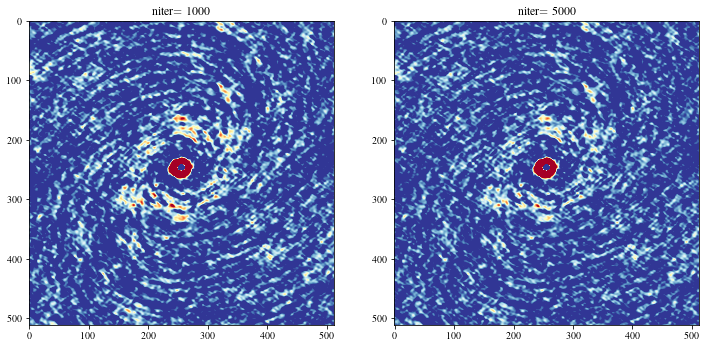

In [35]:
fig, axes = plt.subplots(1, 2, figsize=(12,6))

axes[0].imshow(old_map_data[0, 0], vmax=median+5*std, vmin=0, 
                            cmap='RdYlBu_r')
axes[1].imshow(new_map_data[0, 0], vmax=median+5*std, vmin=0, 
                            cmap='RdYlBu_r')
axes[0].set_title('niter$=1000$')
axes[1].set_title('niter$=5000$')

plt.savefig('../figures/cleaning_effect_SiOv2_full.png', dpi=300)

From here it seems as if at large scales, there still are these apparent residuals.

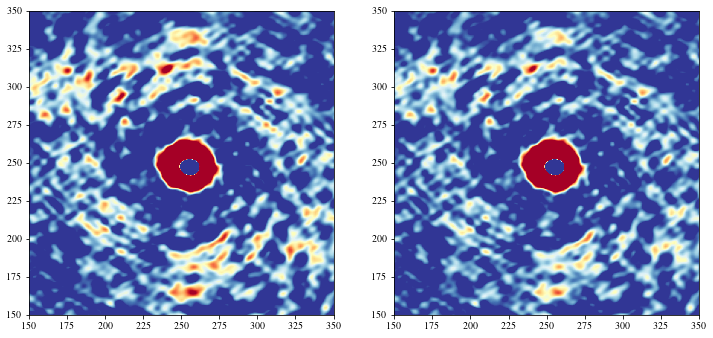

In [36]:
fig, axes = plt.subplots(1, 2, figsize=(12,6))

axes[0].imshow(old_map_data[0, 0], vmax=median+5*std, vmin=0, 
                            cmap='RdYlBu_r')
axes[1].imshow(new_map_data[0, 0], vmax=median+5*std, vmin=0, 
                            cmap='RdYlBu_r')
for ax in axes:
    ax.set_xlim(150, 350)
    ax.set_ylim(150, 350)

plt.savefig('../figures/cleaning_effect_SiOv2_zoomed.png', dpi=300)